# Support Vector Machines

## Linear SVM Classification:

Fundamental idea behind SVM can be understand with help of below figure. Figure shows part of iris dataset. Two classes can easily be seperated with a straight line (they are linearly seperable). 

Left plot shows the decision boundaries of three possible linear classifiers. The modes whose decision boundary is represented by dashed line is so bad that it does not even seperate the classes properly. The other two model works perfectly on this training set, but their decision boundaries are so close to the instances that these models might not perform well on training set.

In contrast, the solid line in the plot on the right side represents decision boundary of an SVM classifier, the line not only seperates the two classes but also stays far away from closest training instances as possible. 

We can think of SVM classifer as fitting the widest possible street (represented by dotted parallel line) between the classes. This is called `large margin classification`.

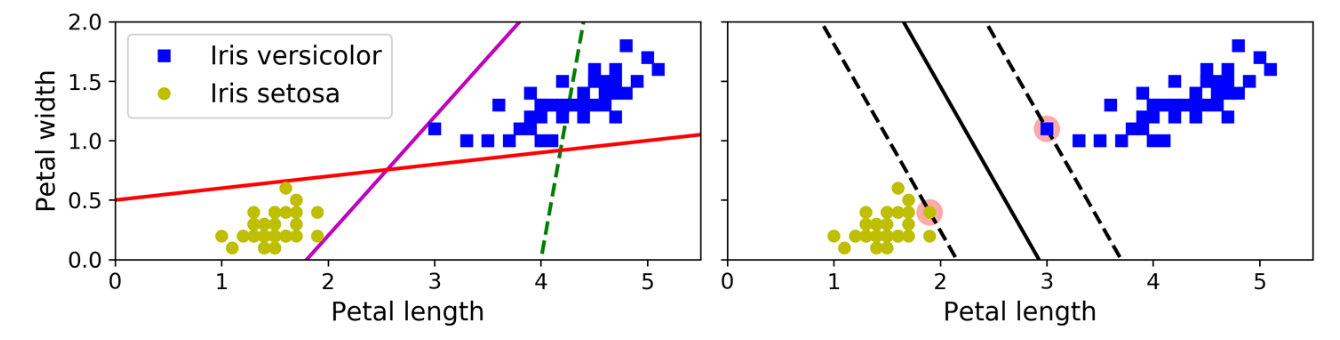

Adding more training instances "off the street" will not affect the decision boundary at all: it is fully determined (or "supported" ) by the instances located on the edge of the street. These instances are called `support vectors` (circled in right plot)

### Soft Margin Classification

If we stricty impose that all the instances must be off the off street and on the right side, this is called `hard margin classification`. (The "right side" refers to the side where the instances of a particular class should be positioned.) There are two main issues with hard margin classification. First, it only works if the data is linearly seperable. Second it is sensitive to outliers. Below figure shows the iris dataset with one additional outlier: on left it is impossible to find hard margin; on right the decision boundary ends up very different than we saw in above figure without outlier and it will not generalize as well.

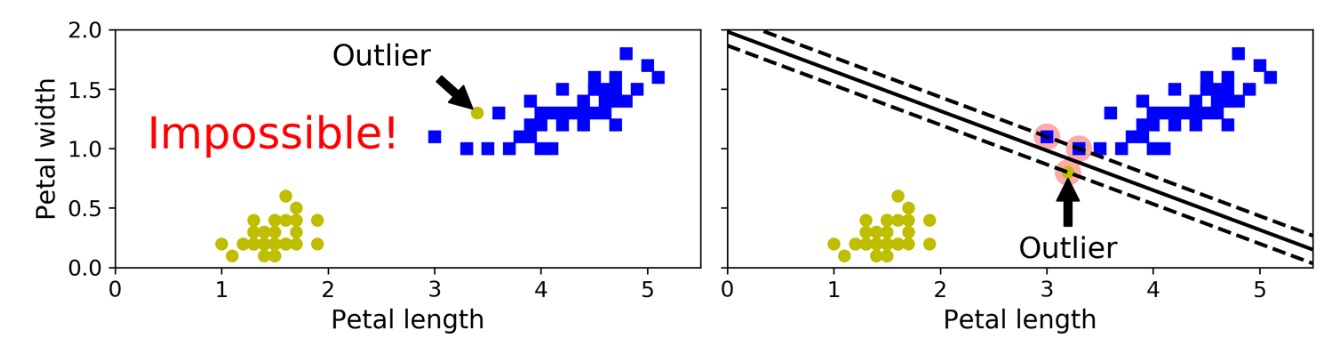

To avoid these issues, use more flexible model. The objective is to find a good balance between keeping the streets as wide as possible and limiting the margin violations (i.e., instances that end up in the middle of the street or even on wrong side.) This is called `soft margin classification`.

When creating a SVM model using Scikit-Learn, we can specify number of hyperparameters. `C` is one of those hyperparameters. If we set it to low rate, then we end up with model on right (see below figure). With high value we get model on the right. Margin violations are bad. It is usually better to have few of them. However, in this case the model on the left has a lot of margin violation but will probably generalize better.

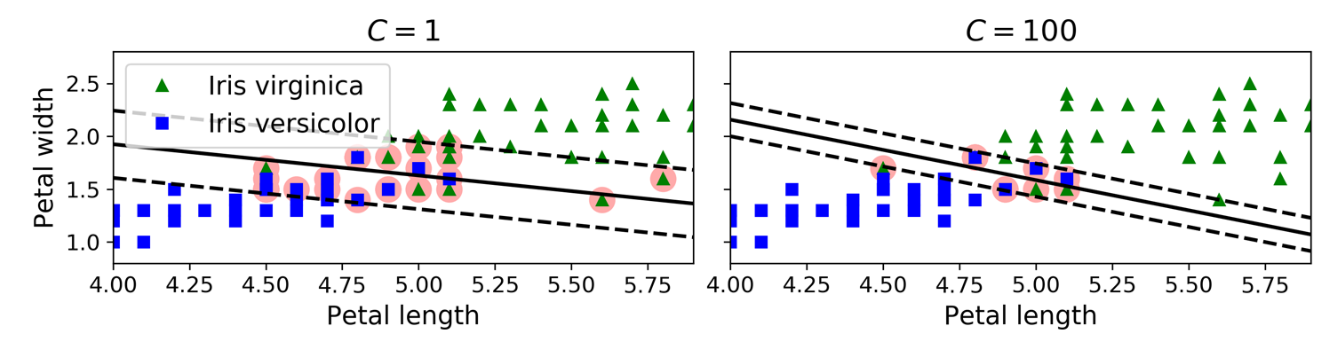

The following Scikit-Learn code loads the iris dataset, scales the features, and then trains a
linear SVM model (using the `LinearSVC` class with `C=1` and the `hinge loss` function) to detect Iris virginica flowers.

In [1]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
X = iris["data"][:,(2,3)] # petal length, petal width
y = (iris["target"] == 2).astype(np.float64)

svm_clf = Pipeline([
    ("scaler",StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge"))
])

svm_clf.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

In [2]:
svm_clf.predict([[5.5,1.7]])

array([1.])

**NOTE:**

Unlike Logistic Regression classifiers, SVM classifiers do not output probabilities for each class.

Instead of using the `LinearSVC class`, we could use the `SVC` class with a `linear` kernel.
When creating the SVC model, we would write `SVC(kernel="linear", C=1)`. 

Or we could use the `SGDClassifier` class, with `SGDClassifier(loss="hinge", alpha=1/(m*C))`. This applies regular Stochastic Gradient Descent to train a linear SVM classifier. It does not converge as fast as the LinearSVC class, but it can be useful to handle online classification tasks or huge datasets that do not fit in memory (out-of-core training).

## NonLinear SVM Classification

To implement this idea using Scikit-Learn, create a `Pipeline` containing a
`PolynomialFeatures` transformer, followed by a `StandardScaler` and a `LinearSVC`. Let’s test this on the moons dataset: this is a toy dataset
for binary classification in which the data points are shaped as two interleaving half circles

In [6]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures

X,y  = make_moons(n_samples=100, noise=0.15)

polynomial_svm_clf = Pipeline([
    ("poly_features", PolynomialFeatures(degree=3)),
    ("scaler", StandardScaler()),
    ("svm_clf", LinearSVC(C=10, loss="hinge"))
])

polynomial_svm_clf.fit(X,y)

Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge'))])

In [8]:
y

array([1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0])

Plotting moons dataset to visulaize it

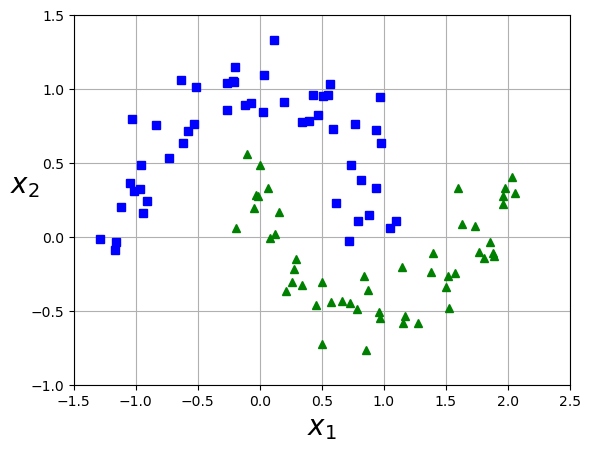

In [9]:
import matplotlib.pyplot as plt 

def plot_dataset(X,y, axes):
    plt.plot(X[:,0][y==0], X[:,1][y==0], "bs")
    plt.plot(X[:,0][y==1], X[:,1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which="both")
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X,y, [-1.5,2.5,-1,1.5])
plt.show()

Plotting Predictions

In [18]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0,x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    # print(y_pred)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    # print(y_decision)
    plt.contourf(x0,x1,y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0,x1,y_decision, cmap=plt.cm.brg, alpha=0.1)

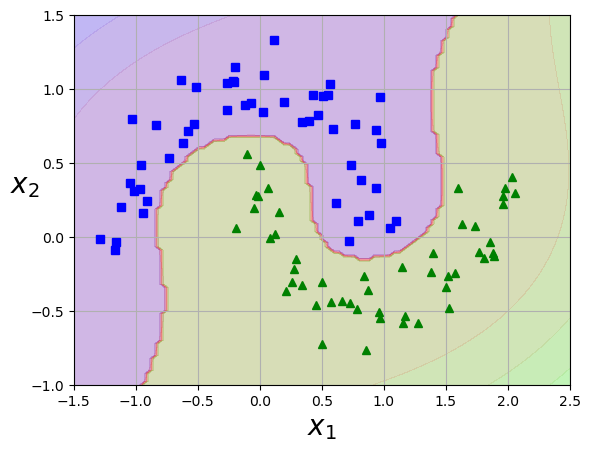

In [19]:
plot_predictions(polynomial_svm_clf, [-1.5,2.5,-1,1.5])
plot_dataset(X,y, [-1.5,2.5,-1,1.5])
plt.show()

### Polynomial Kernel

The `kernal trick` trick is implemented by the SVC class. Let’s test it on the moons datase

In [20]:
from sklearn.svm import SVC

poly_kernal_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
])

poly_kernal_svm_clf.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

This code trains an SVM classifier using a third-degree polynomial kernel. It is represented
on the left in Figure. On the right is another SVM classifier using a 10th-degree
polynomial kernel. Obviously, if our model is overfitting, we might want to reduce the polynomial degree. Conversely, if it is underfitting, we can try increasing it. The
hyperparameter `coef0` controls how much the model is influenced by high-degree
polynomials versus low-degree polynomials.

In [21]:
poly100_kernal_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=10, coef0=100, C=5))
])

poly100_kernal_svm_clf.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=100, degree=10, kernel='poly'))])

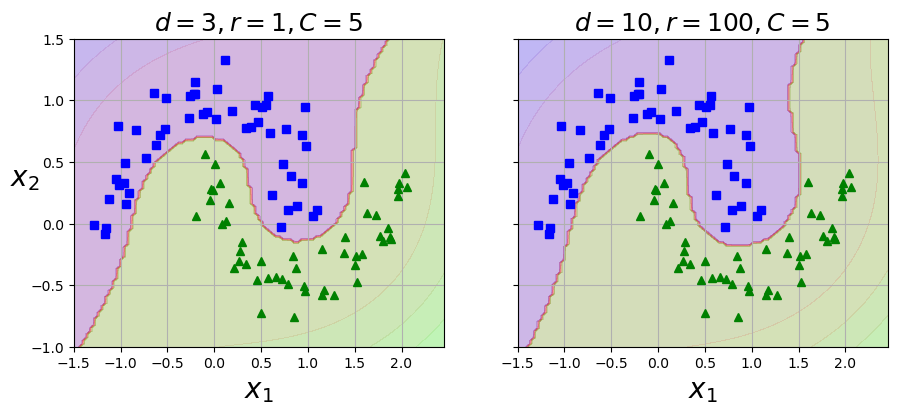

In [22]:
fig, axes = plt.subplots(ncols=2, figsize=(10.5,4), sharey=True)

plt.sca(axes[0])
plot_predictions(poly_kernal_svm_clf, [-1.5,2.45, -1, 1.5])
plot_dataset(X,y,[-1.5,2.45, -1, 1.5])
plt.title(r"$d=3, r=1, C=5$", fontsize=18)

plt.sca(axes[1])
plot_predictions(poly100_kernal_svm_clf, [-1.5,2.45, -1, 1.5])
plot_dataset(X,y,[-1.5,2.45, -1, 1.5])
plt.title(r"$d=10, r=100, C=5$", fontsize=18)
plt.ylabel("")
plt.show()

**TIP:**

A common approach to finding the right hyperparameter values is to use grid search . It is
often faster to first do a very coarse grid search, then a finer grid search around the best values found.
Having a good sense of what each hyperparameter actually does can also help you search in the right part
of the hyperparameter space.

### Gaussian RBF Kernel

Let’s try the SVC class with the Gaussian RBF kernel:

In [23]:
rbf_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="rbf", gamma=0.5, C=0.001))
])

rbf_kernel_svm_clf.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=0.5))])

This model is represented at the bottom left in below figure. The other plots show models
trained with different values of hyperparameters `gamma`($\gamma$) and `C`.

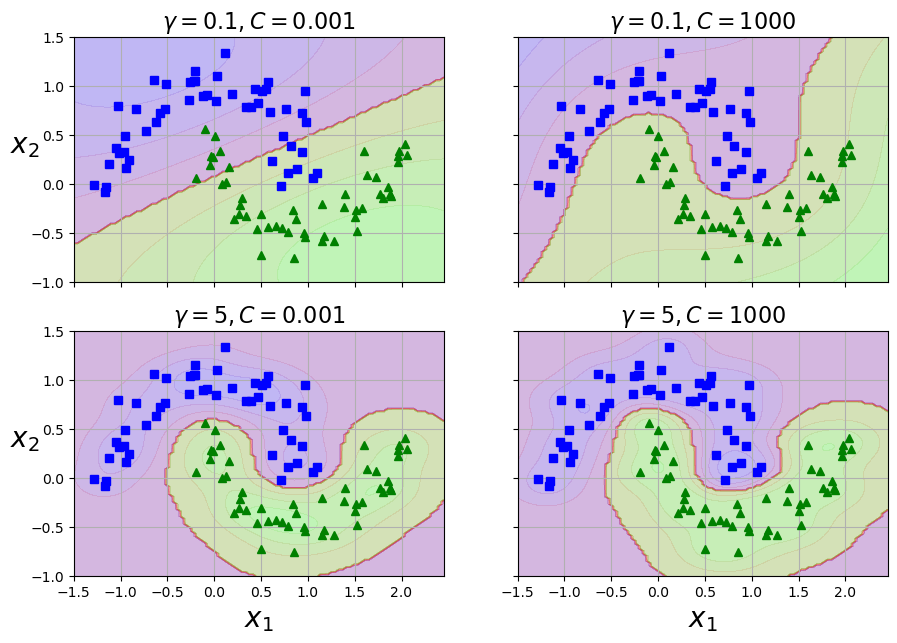

In [27]:
gamma1, gamma2 = 0.1, 5
C1, C2 = 0.001, 1000

hyperparams = (gamma1, C1) , (gamma1, C2), (gamma2, C1), (gamma2,C2)

svm_clfs = []

for gamma, C in hyperparams:
    rbf_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="rbf", gamma=gamma, C=C))
    ])
    rbf_kernel_svm_clf.fit(X,y)
    svm_clfs.append(rbf_kernel_svm_clf)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10.5,7), sharex=True, sharey=True)

for i, svm_clf in enumerate(svm_clfs):
    plt.sca(axes[i // 2, i % 2])
    plot_predictions(svm_clf, [-1.5,2.45,-1,1.5])
    plot_dataset(X, y , [-1.5,2.45,-1,1.5])
    gamma, C = hyperparams[i]
    plt.title(r"$\gamma = {}, C = {}$".format(gamma,C), fontsize=16)
    if i in (0,1):
        plt.xlabel("")
    if i in (1,3):
        plt.ylabel("")

plt.show()

Increasing gamma makes
the bell-shaped curve narrower (see the righthand plots in figure). As a result, each
instance’s range of influence is smaller: the decision boundary ends up being more
irregular, wiggling around individual instances. Conversely, a small gamma value makes the
bell-shaped curve wider: instances have a larger range of influence, and the decision
boundary ends up smoother. So $\gamma$ acts like a regularization hyperparameter: if our model
is overfitting, we should reduce it; if it is underfitting, we should increase it (similar to
the C hyperparameter).

Other kernels exist but are used much more rarely. Some kernels are specialized for
specific data structures. `String kernels` are sometimes used when classifying text
documents or DNA sequences (e.g., using the `string subsequence kernel` or kernels based
on the `Levenshtein distance`).

## SVM Regression

In [30]:
np.random.seed(42)
m = 50
X = 2 * np.random.rand(m,1)
y = (4 + 3 * X + np.random.rand(m,1)).ravel()

In [31]:
from sklearn.svm import LinearSVR

svm_reg = LinearSVR(epsilon=1.05, random_state=42)
svm_reg.fit(X,y)

LinearSVR(epsilon=1.05, random_state=42)

In [44]:
svm_reg1 = LinearSVR(epsilon=1.05, random_state=42)
svm_reg2 = LinearSVR(epsilon=0.5, random_state=42)
svm_reg1.fit(X,y)
svm_reg2.fit(X,y)

def find_support_vectors(svm_reg, X , y):
    y_pred = svm_reg.predict(X)
    off_margin = (np.abs(y - y_pred)) >= svm_reg.epsilon
    # print(off_margin)
    # print(np.argwhere(off_margin))
    return np.argwhere(off_margin) # argwhere return the index where off_margin == True

svm_reg1.support_ = find_support_vectors(svm_reg1, X, y)
svm_reg2.support_ = find_support_vectors(svm_reg2, X, y)

eps_x1 = 1
eps_y_pred = svm_reg1.predict([[eps_x1]])


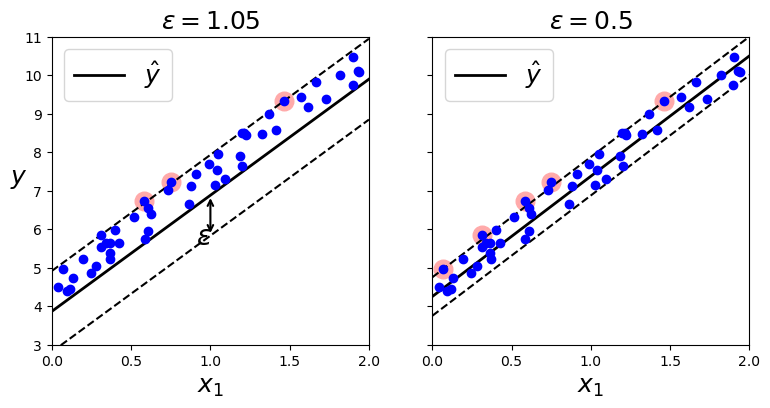

In [45]:
def plot_svm_regression(svm_reg, X, y, axes):
    xls = np.linspace(axes[0],axes[1],100).reshape(100,1)
    y_pred = svm_reg.predict(xls)
    plt.plot(xls, y_pred, "k-", linewidth=2, label=r"$\hat{y}$")
    plt.plot(xls, y_pred + svm_reg.epsilon, "k--")
    plt.plot(xls, y_pred - svm_reg.epsilon, "k--")
    plt.scatter(X[svm_reg.support_], y[svm_reg.support_], s=180, facecolors='#FFAAAA')
    plt.plot(X,y, "bo")
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.legend(loc="upper left", fontsize=18)
    plt.axis(axes)

fig,axes = plt.subplots(ncols=2, figsize=(9,4), sharey=True)
plt.sca(axes[0])
plot_svm_regression(svm_reg1, X, y, [0,2,3,11])
plt.title(r"$\epsilon = {}$".format(svm_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
plt.annotate(
    '', xy=(eps_x1, eps_y_pred), xycoords='data',
    xytext=(eps_x1, eps_y_pred - svm_reg1.epsilon),
    textcoords='data', arrowprops={'arrowstyle': '<->', 'linewidth':1.5}
)
plt.text(0.91, 5.6, r"$\epsilon$", fontsize=20)

plt.sca(axes[1])
plot_svm_regression(svm_reg2, X, y, [0,2,3,11])
plt.title(r"$\epsilon = {}$".format(svm_reg2.epsilon), fontsize=18)

plt.show()

Graph shows two linear SVM Regression models
trained on some random linear data, one with a large margin ($\epsilon$ = 1.5) and the other with a
small margin ($\epsilon$ = 0.5).

Adding more training instances within the margin does not affect the model’s predictions;
thus, the model is said to be  $\epsilon$-*insensitive*.

To tackle nonlinear regression tasks, we can use a kernelized SVM model.

In [46]:
np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1) - 1
y = (0.2 + 0.1 * X + 0.5 * X**2 + np.random.randn(m,1)/10).ravel()

In [47]:
from sklearn.svm import SVR

svm_poly_reg = SVR(kernel='poly', degree=2, C=100, epsilon=0.1, gamma='scale')
svm_poly_reg.fit(X, y)

SVR(C=100, degree=2, kernel='poly')

In [48]:
svm_poly_reg1 = SVR(kernel='poly', degree=2, C=100, epsilon=0.1, gamma='scale')
svm_poly_reg2 = SVR(kernel='poly', degree=2, C=0.01, epsilon=0.1, gamma='scale')
svm_poly_reg1.fit(X,y)
svm_poly_reg2.fit(X,y)

SVR(C=0.01, degree=2, kernel='poly')

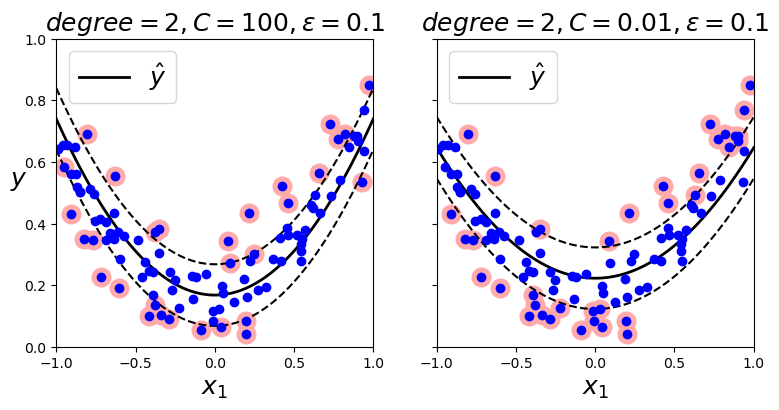

In [52]:
fig, axes = plt.subplots(ncols=2, figsize=(9,4), sharey=True)

plt.sca(axes[0])
plot_svm_regression(svm_poly_reg1, X, y, [-1,1,0,1])
plt.title(r"$degree = {}, C={}, \epsilon = {}$".format(svm_poly_reg1.degree, svm_poly_reg1.C, svm_poly_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)

plt.sca(axes[1])
plot_svm_regression(svm_poly_reg2, X, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg2.degree, svm_poly_reg2.C, svm_poly_reg2.epsilon), fontsize=18)
plt.show()

Graph shows SVM Regression on a random quadratic training set, using a second-degree
polynomial kernel. There is little regularization in the left plot (i.e., a large C value), and
much more regularization in the right plot (i.e., a small C value).